In [43]:
from kan import *
import torch
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [44]:
# Load the data
df_resampled = pd.read_csv('../../data/processed/heart_resampled_se.csv')
df = pd.read_csv('../../data/processed/heart_se.csv')

In [45]:
df.shape

(303, 29)

In [46]:
df.head()

,index,age,resting_blood_pressure,cholesterol,max_heart_rate,oldpeak,sex_1,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,...,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,target
0,0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [47]:
# Split the data into features and target variable
X = df.drop(['target','index'], axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values).view(-1, 1)


In [49]:
dataset = {
    'train_input': X_train_tensor,
    'train_label': y_train_tensor,
    'test_input': X_test_tensor,
    'test_label': y_test_tensor
}


In [50]:
dataset

{'train_input': tensor([[0.2708, 0.2453, 0.3858,  ..., 0.0000, 1.0000, 0.0000],
         [0.6042, 0.5283, 0.3288,  ..., 0.0000, 0.0000, 1.0000],
         [0.3542, 0.5283, 0.2397,  ..., 0.0000, 1.0000, 0.0000],
         ...,
         [0.8333, 0.6226, 0.2466,  ..., 0.0000, 1.0000, 0.0000],
         [0.3542, 0.2453, 0.2808,  ..., 0.0000, 0.0000, 1.0000],
         [0.7083, 0.4340, 0.1575,  ..., 0.0000, 1.0000, 0.0000]]),
 'train_label': tensor([[1],
         [0],
         [0],
         [1],
         [0],
         [1],
         [1],
         [1],
         [0],
         [1],
         [1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [1],
         [1],
         [1],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [0],
         [1],
    

In [51]:
dataset['train_input'].shape

torch.Size([242, 27])

In [52]:
# KAN model training
model = KAN([27,2,1,1], grid=3, k=2)
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float()) 
results = model.fit(dataset, opt="LBFGS", steps=3, metrics=(train_acc, test_acc))
results['train_acc'][-1], results['test_acc'][-1]
train_loss = results['train_loss']
train_acc = results['train_acc']
test_acc = results['test_acc']
test_loss = results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                            | 0/3 [00:00<?, ?it/s]

| train_loss: 2.00e-01 | test_loss: 3.73e-01 | reg: 2.05e+01 | : 100%|█| 3/3 [00:00<00:00, 13.70it/s

saving model version 0.1


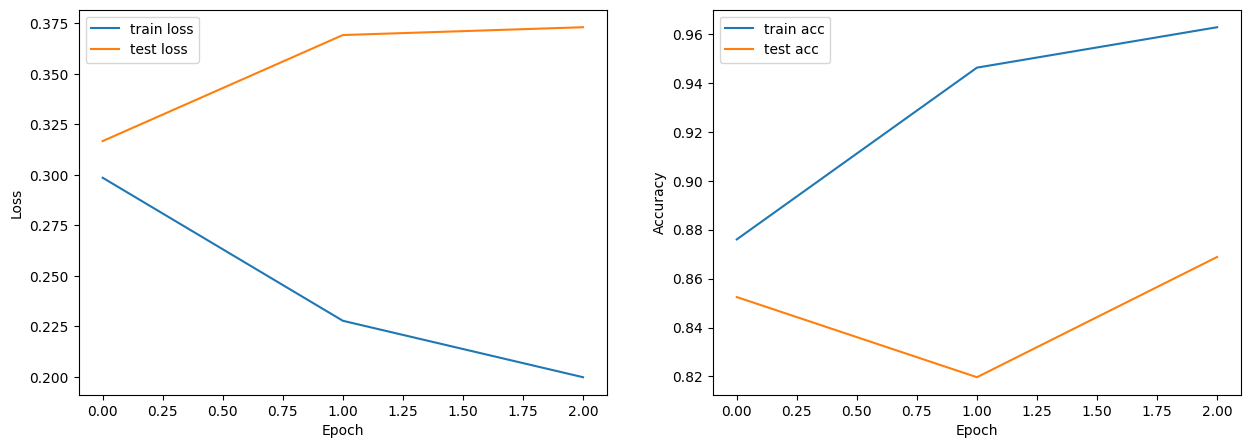

In [53]:
train_loss = results['train_loss']
train_acc = results['train_acc']
test_acc = results['test_acc']
test_loss = results['test_loss']

# Plot the training and testing loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(train_loss, label='train loss')
ax[0].plot(test_loss, label='test loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='train acc')
ax[1].plot(test_acc, label='test acc')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

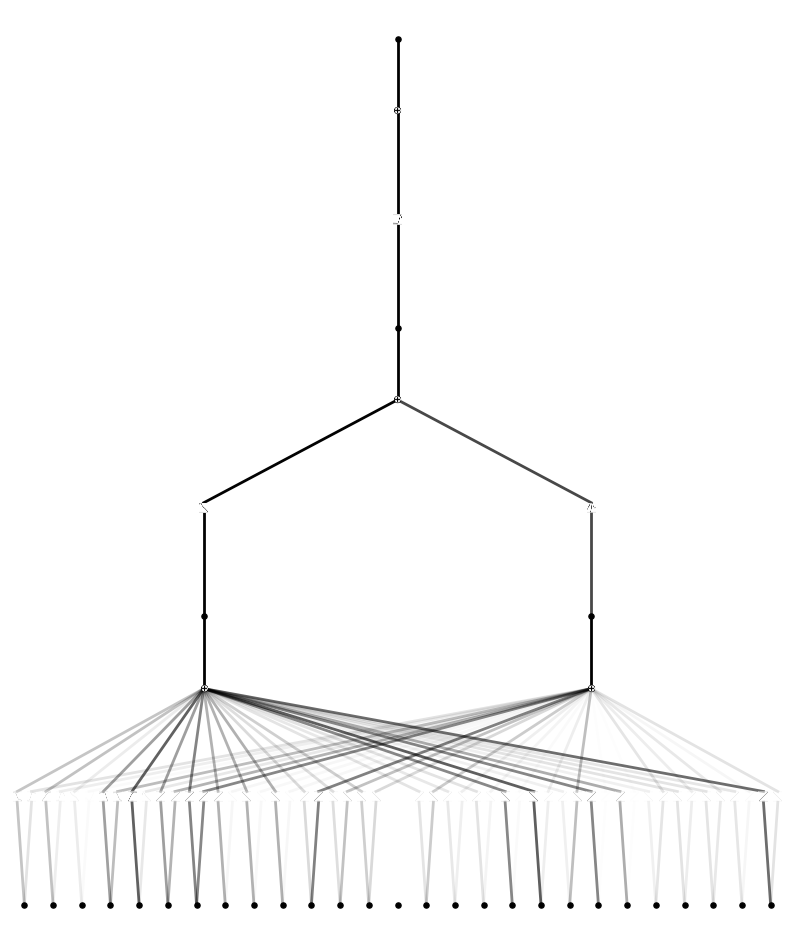

In [54]:
model.plot(scale=1)

In [55]:
model.prune()

saving model version 0.2


MultKAN(
  (act_fun): ModuleList(
    (0-2): 3 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-2): 3 x Symbolic_KANLayer()
  )
)

In [56]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.9013974666595459, c=1
fixing (0,0,1) with x, r2=0.7430426478385925, c=1
fixing (0,1,0) with sin, r2=0.999091625213623, c=2
fixing (0,1,1) with x, r2=0.7639369964599609, c=1
fixing (0,2,0) with x, r2=0.9617271423339844, c=1
fixing (0,2,1) with x, r2=0.03944891691207886, c=1
fixing (0,3,0) with x, r2=0.6189687848091125, c=1
fixing (0,3,1) with sin, r2=0.9963317513465881, c=2
fixing (0,4,0) with sin, r2=0.9961116909980774, c=2
fixing (0,4,1) with x, r2=0.28308984637260437, c=1
fixing (0,5,0) with x, r2=1.0000003576278687, c=1
fixing (0,5,1) with x, r2=1.0000005960464478, c=1
fixing (0,6,0) with x, r2=1.0000004768371582, c=1
fixing (0,6,1) with x, r2=1.0000007152557373, c=1
fixing (0,7,0) with x, r2=0.9999998211860657, c=1
fixing (0,7,1) with x, r2=0.9999881982803345, c=1
fixing (0,8,0) with x, r2=1.0000001192092896, c=1
fixing (0,8,1) with x, r2=0.9999866485595703, c=1
fixing (0,9,0) with x, r2=0.9999998807907104, c=1
fixing (0,9,1) with x, r2=0.999976754188537

In [57]:
model.symbolic_formula()[0][0]


0.174104552795952*x_1 + 0.135035000942618*x_10 - 0.0149301807831455*x_11 + 0.0221334758070901*x_12 + 0.0432333070071561*x_13 - 0.00802537927252628*x_14 - 0.0381623755899725*x_15 - 0.043799228108893*x_16 - 0.0308842290881054*x_17 + 0.134788471581012*x_18 + 0.194295307939627*x_19 + 0.00749647498878036*x_2 - 0.0352900524115325*x_20 - 0.168651443320441*x_21 - 0.174808542714666*x_22 + 0.0556002006105791*x_23 + 0.125397309771812*x_24 + 0.047351515828899*x_25 - 0.0240965633312863*x_26 - 0.175275726293319*x_27 + 0.0892793369768566*x_3 + 0.211768608358643*x_4 - 0.00512843578879615*x_5 - 0.108532244558232*x_6 - 0.112896783895222*x_7 - 0.117418828760244*x_8 + 0.0975861808754208*x_9 + 2.46708440810673e-6*exp(5.82904005050659*x_22) + 0.0778908808889796*sin(2.67567992210388*x_2 - 4.0350399017334) - 0.0100546751259857*sin(4.57863998413086*x_4 - 2.37799978256226) + 0.180069366111131*sin(2.94263982772827*x_5 + 2.4171998500824) + 0.352589131778484 - 0.000499989889949006*exp(-9.85599994659424*x_21)

In [58]:
formula1 = model.symbolic_formula()[0][0]
ex_round(formula1, 4)

0.1741*x_1 + 0.135*x_10 - 0.0149*x_11 + 0.0221*x_12 + 0.0432*x_13 - 0.008*x_14 - 0.0382*x_15 - 0.0438*x_16 - 0.0309*x_17 + 0.1348*x_18 + 0.1943*x_19 + 0.0075*x_2 - 0.0353*x_20 - 0.1687*x_21 - 0.1748*x_22 + 0.0556*x_23 + 0.1254*x_24 + 0.0474*x_25 - 0.0241*x_26 - 0.1753*x_27 + 0.0893*x_3 + 0.2118*x_4 - 0.0051*x_5 - 0.1085*x_6 - 0.1129*x_7 - 0.1174*x_8 + 0.0976*x_9 + 0.0779*sin(2.6757*x_2 - 4.035) - 0.0101*sin(4.5786*x_4 - 2.378) + 0.1801*sin(2.9426*x_5 + 2.4172) + 0.3526 - 0.0005*exp(-9.856*x_21)

In [59]:

def acc(formula1, X, y):
    batch = X.shape[0]
    correct = 0
    num_features = X.shape[1]  # Assuming X has 27 features
    logits = []

    for i in range(batch):
        # Initialize substituted formulas
        substituted_formula1 = formula1

        # Substitute all x_1, x_2, ..., x_27 with the corresponding values in X[i, :]
        for j in range(num_features):
            substituted_formula1 = substituted_formula1.subs(f'x_{j+1}', X[i, j])

        # Convert the substituted formulas to floats (assuming they evaluate to scalar values)
        logit1 = np.array(substituted_formula1).astype(np.float64)

        # Check if the prediction matches the true label
        correct += np.round(logit1) == y[i]
        logits.append([float(logit1) ,y[i].item()])

    return correct / batch, logits

print('train acc of the formula:', acc(formula1, dataset['train_input'], dataset['train_label'])[0])
print('test acc of the formula:', acc(formula1, dataset['test_input'], dataset['test_label'])[0])


train acc of the formula: tensor([0.8347])
test acc of the formula: tensor([0.8689])


In [60]:
#plot logits
_, logits = acc(formula1, dataset['test_input'], dataset['test_label'])


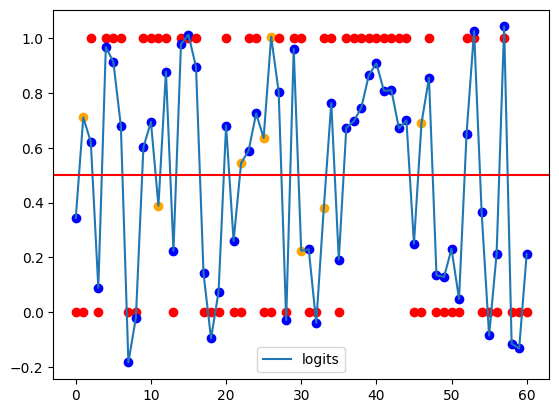

In [61]:
#plot logits and true labels, logits with a line
import matplotlib.pyplot as plt
import numpy as np

logits = np.array(logits)
plt.plot(logits[:,0], label='logits')
for i in range(logits.shape[0]):
    plt.scatter(i, logits[i,1], color='red')
    if round(logits[i,0]) == logits[i,1]:
        color = 'blue' # Correct prediction
    else:
        color = 'orange' # Incorrect prediction
    plt.scatter(i, logits[i,0], color=color)
#line at 0.5
plt.axhline(y=0.5, color='r', linestyle='-')
plt.legend()


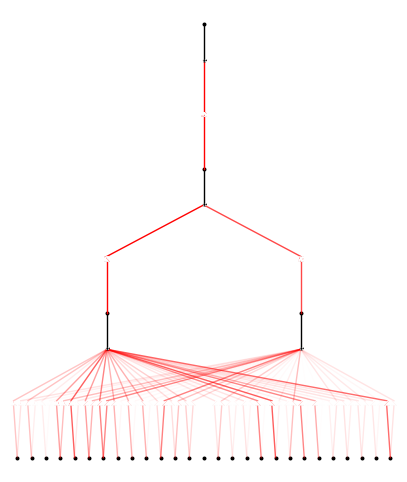

In [62]:
model.plot()